## The Moving Average (MA) Model

* Definition 

  * $$
    r_t = c + \theta_1\epsilon_{t-1} + \epsilon_t
    $$

  * $r_t$: The values of "r" in the current period 

  * $\theta_1$: A numeric coefficient for the value associated with the 1st lag, $|\theta_n|<1$ to prevent compounded effects exploding in magnitude 

  * $\epsilon_t$: Residuals for the current period 

  * $\epsilon_{t-1}$: Residuals for the past period

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('../data/Index2018.csv')
df_comp = raw_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size].copy(), df_comp.iloc[size:].copy()

In [4]:
df['returns'] = df.market_value.pct_change(1).mul(100)

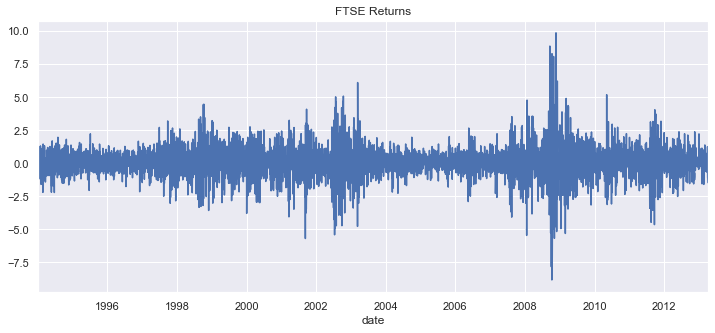

In [44]:
df.returns.plot(figsize=(12, 5))
plt.title('FTSE Returns')
plt.show()

# LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF=1):
    # DF: degrees of freedom
    
    # log likelihood
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    
    # test statistic
    LR = (2 * (L2 - L1))
    p = chi2.sf(LR, DF).round(3)
    
    return p

# ACF for Returns

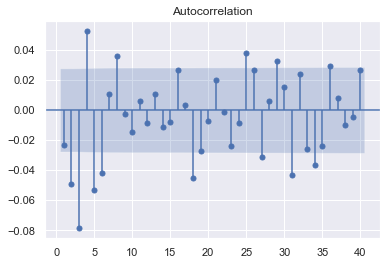

In [51]:
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.show()

# MA(1) for Returns

$$
r_t = c + \theta_1\epsilon_{t-1} + \epsilon_t
$$

ARMA(order=(P, Q))  
p: AR components   
Q: MA components  


In [7]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0, 1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Thu, 21 Jan 2021   AIC                          15865.190
Time:                        20:53:47   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

The p-values for both constant and the coefficient are not significant with 5% significance level. We know this from the ACF graph that the autocorrelation with the first lag is within the blue shade area. However, there are higher lags such as 2nd, 3rd, 4th, 5th, 6th lags that are significant. Therefore, we will check higher lag MA models. 

# Higher-Lag MA Model for Returns

## MA(2)
$$
r_t = c + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \epsilon_t
$$

In [8]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0, 2))
results_ret_ma_2 = model_ret_ma_2.fit()
results_ret_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Thu, 21 Jan 2021   AIC                          15853.728
Time:                        20:53:47   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     -3.669      0.000      -0.077      -0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.1499           +0.0000j            4.1499            0.0000
MA.2           -4.8004           +0.0000j            4.8004            0.5000
-----------------------------------------------------------------------------
"""

In [9]:
LLR_test(model_ret_ma_1, model_ret_ma_2, DF=1)

0.0

The coefficient for the second lag is significant (0.000) but the one for the first lag is not significant (0.022). This matches up with the ACF. Also, LLR test shows that MA(2) is significantly better than MA(1).

## MA(3)

In [10]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0, 3))
results_ret_ma_3 = model_ret_ma_3.fit()
results_ret_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Thu, 21 Jan 2021   AIC                          15818.634
Time:                        20:53:47   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     -4.134      0.000      -0.082      -0.029
ma.L3.returns    -0.0904      0.015     -6.121      0.000      -0.119      -0.061
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.0105           -0.0000j            2.0105           -0.0000
MA.2           -1.3129           -1.9441j            2.3459           -0.3445
MA.3           -1.3129           +1.9441j            2.3459            0.3445
-----------------------------------------------------------------------------
"""

In [11]:
LLR_test(model_ret_ma_2, model_ret_ma_3, DF=1)

0.0

As same as the previous result, the coefficients for the lag 2 and 3 are significant. We can continue until we see the coefficient for the highest lag.

## MA(4)

In [12]:
model_ret_ma_4 = ARMA(df.returns[1:], order=(0, 4))
results_ret_ma_4 = model_ret_ma_4.fit()
results_ret_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Thu, 21 Jan 2021   AIC                          15809.547
Time:                        20:53:48   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     -3.902      0.000      -0.083      -0.027
ma.L3.returns    -0.0922      0.015     -6.306      0.000      -0.121      -0.064
ma.L4.returns     0.0454      0.014      3.338      0.001       0.019       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2257           -1.4206j            1.8763           -0.3633
MA.2           -1.2257           +1.4206j            1.8763            0.3633
MA.3            2.2405           -1.1103j            2.5006           -0.0732
MA.4            2.2405           +1.1103j            2.5006            0.0732
-----------------------------------------------------------------------------
"""

In [13]:
LLR_test(model_ret_ma_3, model_ret_ma_4, DF=1)

0.001

## MA(5)

In [14]:
model_ret_ma_5 = ARMA(df.returns[1:], order=(0, 5))
results_ret_ma_5 = model_ret_ma_5.fit()
results_ret_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Thu, 21 Jan 2021   AIC                          15799.645
Time:                        20:53:48   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     -3.518      0.000      -0.077      -0.022
ma.L3.returns    -0.0852      0.015     -5.799      0.000      -0.114      -0.056
ma.L4.returns     0.0458      0.014      3.374      0.001       0.019       0.072
ma.L5.returns    -0.0500      0.014     -3.454      0.001      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2127           -1.0805j            1.6242           -0.3842
MA.2           -1.2127           +1.0805j            1.6242            0.3842
MA.3            1.7305           -0.0000j            1.7305           -0.0000
MA.4            0.8062           -1.9326j            2.0940           -0.1871
MA.5            0.8062           +1.9326j            2.0940            0.1871
-----------------------------------------------------------------------------
"""

In [15]:
LLR_test(model_ret_ma_4, model_ret_ma_5, DF=1)

0.001

## MA(6)

In [16]:
model_ret_ma_6 = ARMA(df.returns[1:], order=(0, 6))
results_ret_ma_6 = model_ret_ma_6.fit()
results_ret_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Thu, 21 Jan 2021   AIC                          15794.442
Time:                        20:53:50   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     -3.436      0.001      -0.076      -0.021
ma.L3.returns    -0.0827      0.014     -5.846      0.000      -0.110      -0.055
ma.L4.returns     0.0466      0.014      3.434      0.001       0.020       0.073
ma.L5.returns    -0.0484      0.014     -3.371      0.001      -0.077      -0.020
ma.L6.returns    -0.0387      0.014     -2.682      0.007      -0.067      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5011           -0.0000j            1.5011           -0.0000
MA.2            0.8248           -1.4775j            1.6921           -0.1690
MA.3            0.8248           +1.4775j            1.6921            0.1690
MA.4           -1.0066           -1.2260j            1.5863           -0.3594
MA.5           -1.0066           +1.2260j            1.5863            0.3594
MA.6           -2.3891           -0.0000j            2.3891           -0.5000
-----------------------------------------------------------------------------
"""

In [17]:
LLR_test(model_ret_ma_5, model_ret_ma_6, DF=1)

0.007

## MA(7)

In [18]:
model_ret_ma_7 = ARMA(df.returns[1:], order=(0, 7))
results_ret_ma_7 = model_ret_ma_7.fit()
results_ret_ma_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Thu, 21 Jan 2021   AIC                          15796.091
Time:                        20:53:51   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     -3.454      0.001      -0.077      -0.021
ma.L3.returns    -0.0821      0.014     -5.789      0.000      -0.110      -0.054
ma.L4.returns     0.0458      0.014      3.360      0.001       0.019       0.073
ma.L5.returns    -0.0486      0.014     -3.381      0.001      -0.077      -0.020
ma.L6.returns    -0.0390      0.014     -2.702      0.007      -0.067      -0.011
ma.L7.returns     0.0085      0.014      0.592      0.554      -0.020       0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9690           -1.1814j            1.5279           -0.3593
MA.2           -0.9690           +1.1814j            1.5279            0.3593
MA.3           -2.0397           -0.0000j            2.0397           -0.5000
MA.4            0.7516           -1.5246j            1.6998           -0.1771
MA.5            0.7516           +1.5246j            1.6998            0.1771
MA.6            1.5538           -0.0000j            1.5538           -0.0000
MA.7            5.5175           -0.0000j            5.5175           -0.0000
-----------------------------------------------------------------------------
"""

In [19]:
LLR_test(model_ret_ma_6, model_ret_ma_7, DF=1)

0.554

This shows that MA(7) is not better than MA(6). However, as the ACF graph shows, the 7th lag does not have a significant autocorrelation whereas the 8th lag does. Therefore, we still want to test the MA(8).

## MA(8)

In [20]:
model_ret_ma_8 = ARMA(df.returns[1:], order=(0, 8))
results_ret_ma_8 = model_ret_ma_8.fit()
results_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Thu, 21 Jan 2021   AIC                          15791.205
Time:                        20:53:53   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.returns    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.returns     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.returns    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.returns    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.returns     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.returns     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

In [21]:
LLR_test(model_ret_ma_7, model_ret_ma_8, DF=1)

0.009

This proves MA(8) is better than MA(7). However, is MA(8) better than MA(6)?

In [22]:
LLR_test(model_ret_ma_6, model_ret_ma_8, DF=2)

0.027

As it is less than 0.05, we can say MA(8) is better than MA(6)!

# Residuals for Returns

To make sure our assumptions are satisfied, we need to check if the residuals resemble white noise. That is, 
- 1) The mean is constant (0)
- 2) Variation is constant = stationary
- 3) No autocorrelation

Let's see all of them satisfy.

In [25]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[:]

First, the first condition of the mean 0 is satisfied. 

In [33]:
# 1. check mean and std 
print("mean: " + str(df['res_ret_ma_8'].mean().round(3)),
    "\nstandard deviation: " + str(df['res_ret_ma_8'].std().round(3)))

mean: -0.0 
standard deviation: 1.164


Also, from the standard deviation, we can estimate how far off our predictions can be. With std=1.164, 99.7 percentile of the data (3 std away from the mean) will live in 1.164 * 3 = 3.492. This means in the worst case scenario, our prediction can be ~7% of from the actual value; if the prediction is 3.5 and the actual is -3.5. 

Second, given the p-value of Dickie-Fuller test is 0.0, the residuals are coming from a stationary process. 

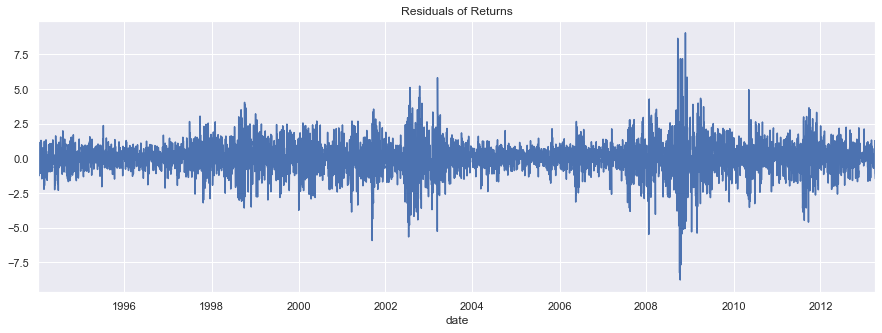

In [34]:
# 2. stationarity 
df.res_ret_ma_8.plot(figsize=(15, 5))
plt.title("Residuals of Returns")
plt.show()

In [38]:
# Dickie-Fuller test for stationary test
sts.adfuller(df.res_ret_ma_8[2:])

(-70.83581919699557,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052185267185)

Third, coefficients for the most of the lags are non-significant. Some values after 18 lags have significant coefficients but they should not play a major role in estimations as the market adjusts to the shocks and the values far in the past lose relevance. 

The fact that the first 8 lags have coefficients close to zero make sense because we fit the model with first 8 lags and residuals for that period should be much smaller than later periods. 

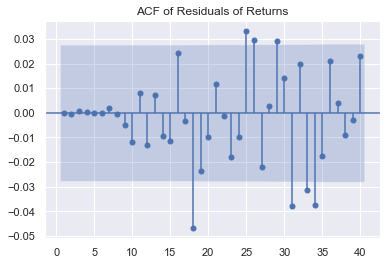

In [39]:
# 3. Auto correlation
sgt.plot_acf(df.res_ret_ma_8[2:], zero=False, lags=40)
plt.title("ACF of Residuals of Returns")
plt.show()

# Normalized Returns

Normalized returns is the return values relative to the first return. That is, 
$$ X'_t = \frac{X_t}{X_1} \times 100$$

In [46]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

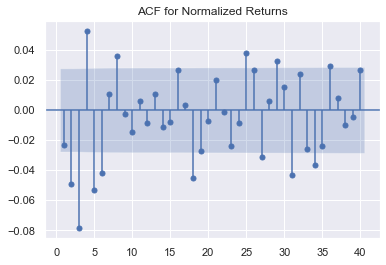

In [52]:
sgt.plot_acf(df.norm_ret[1:], zero=False, lags=40)
plt.title('ACF for Normalized Returns')
plt.show()

Compared to the ACF of the raw raturn, the ACF graph looks almost the same. This verifies that normalizing the values doesn't change the autocorrelation. Again, from this graph, we get an idea of which lags to include - either MA(6) or MA(8).

In [53]:
model_norm_ret_ma_8 = ARMA(df.norm_ret[1:], (0, 8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Sat, 23 Jan 2021   AIC                          80635.194
Time:                        22:47:42   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.846     -1.354      0.176     -29.310       5.364
ma.L1.norm_ret    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norm_ret    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.norm_ret    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.norm_ret     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.norm_ret    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.norm_ret    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.norm_ret     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.norm_ret     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

This results also are the same as the results using non-normalized data. 

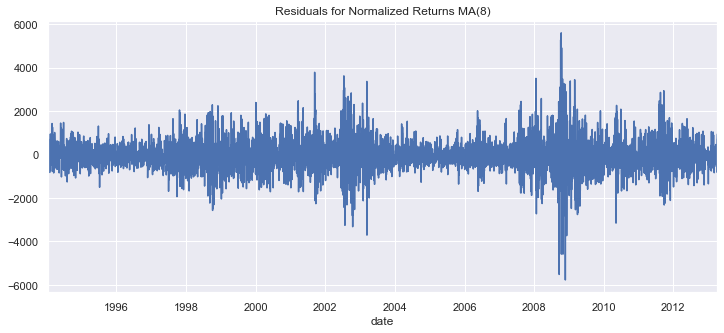

In [57]:
results_norm_ret_ma_8.resid.plot(figsize=(12, 5))
plt.title('Residuals for Normalized Returns MA(8)')
plt.show()